## Logistic Regression

In [1]:
# used for manipulating directory paths
import os
# Scientific and vector computation for python
import numpy as np
# Plotting library
from matplotlib import pyplot
# Optimization module in scipy
from scipy import optimize
# library written for this exercise
import utils
# tells matplotlib to embed plots within the notebook
%matplotlib inline

from jupyterthemes import get_themes
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('onedork')

In [2]:
# Load training dataset and test dataset

data = np.loadtxt(os.path.join('Data', 'Training delima.csv'), delimiter=',')
data_C = np.loadtxt(os.path.join('Data', 'Cross delima.csv'), delimiter=',')
X, y = data[:, [0,3,4,5,7,9]], data[:, 10]
y = y.astype(int)
m = y.size
X_C, y_C = data_C[:, [0,3,4,5,7,9]], data_C[:, 10]
y_C = y_C.astype(int)


In [3]:
def  featureNormalize(X):
    X_norm = X.copy()
    mu = np.zeros(X.shape[1])
    sigma = np.zeros(X.shape[1])

    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    
    return X_norm, mu, sigma

In [4]:
def predict(theta, X):
    m = X.shape[0] # Number of training examples
    # You need to return the following variables correctly
    p = np.zeros(m)

    p=np.round(sigmoid(np.dot(X,theta)))
    
    return p

In [5]:
def sigmoid(z):
    z = np.array(z)

    g = np.zeros(z.shape)

    g = 1 / (1 + np.exp(-z))

    return g

In [6]:
print(type(X))
X, mu, sigma = featureNormalize(X)
X_C, mu, sigma = featureNormalize(X_C)

print(type(X))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [7]:
m, n = X.shape
X = np.concatenate([np.ones((m, 1)), X], axis=1)
m_C, n_C = X_C.shape
X_C = np.concatenate([np.ones((m_C, 1)), X_C], axis=1)

In [8]:
def costFunction(theta, X, y):

    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(np.dot(X, theta))
    J = (1/m)*np.sum(-np.dot(y,np.log(h)) - np.dot((1-y),np.log(1-h)))
    grad = (1/m)*np.dot((h-y),X)
    
    return J, grad

In [9]:
def costFunctionReg(theta, X, y, lambda_=1):

    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)
    th = theta[1:]

    h = sigmoid(np.dot(X, theta))
    J = J = (1/m)*np.sum(-np.dot(y,np.log(h)) - np.dot((1-y),np.log(1-h))) + ( lambda_ / (2 * m) )* (np.sum((np.power(th,2))))
    
    grad_no_regulation = (1/m)*np.dot((h-y),X)
    grad = (1/m)*np.dot((h-y),X) + (lambda_ / m) * theta
    
    grad[0] = grad_no_regulation[0]

    return J, grad  

In [10]:
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial zero theta parameter:\n', cost)
print('Gradient at initial zero theta parameter:\n', grad)

Cost at initial zero theta parameter:
 0.6931471805599451
Gradient at initial zero theta parameter:
 [ 0.365      -0.009572    0.02889497 -0.07276916 -0.07084674 -0.02514601
 -0.01759494]


In [11]:
# For non_Regularize term

options= {'maxiter': 200}

res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun

# the optimized theta is in the x property
theta = res.x



print('Cost after gradient descent:\n', cost)
print('Theta after gradient descent:\n', theta)

Cost after gradient descent:
 0.3388584368120874
Theta after gradient descent:
 [-2.225658    0.1151636  -1.35179208  0.62372785 -0.011583    1.27379919
  0.24223529]


In [12]:
# Regularize term
options= {'maxiter': 200}
res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)
cost_R = res.fun
theta_R = res.x

print('Cost after gradient descent:\n', cost_R)
print('Theta after gradient descent:\n', theta_R)

Cost after gradient descent:
 0.33973460469502464
Theta after gradient descent:
 [-2.21277783  0.11266251 -1.21162633  0.6176173   0.07790175  1.10970901
  0.23728492]


In [13]:
### Non-Reguralization

p = predict(theta, X)
print('Training Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

p_C = predict(theta, X_C)
print('Cross Validation Accuracy: {:.2f} %'.format(np.mean(p_C == y_C) * 100))


Training Accuracy: 87.05 %
Cross Validation Accuracy: 83.81 %


In [14]:
### Reguralization

p_R = predict(theta_R, X)
print('Training Accuracy: {:.2f} %'.format(np.mean(p_R == y) * 100))

p_C_R = predict(theta_R, X_C)
print('Cross Validation Accuracy: {:.2f} %'.format(np.mean(p_C_R == y_C) * 100))


Training Accuracy: 86.90 %
Cross Validation Accuracy: 83.21 %


## The Non-regulazation is better

## Learning Curve

In [15]:
def learningCurveNoReg(X, y, Xval, yval, lambda_=0):

    # Number of training examples
    m = y.size

    # You need to return these values correctly
    error_train = np.zeros(m)
    error_val   = np.zeros(m)
            
    for i in range(1, m+1):
        Xtrain = X[:i, :];
        ytrain = y[:i];
        res = optimize.minimize(costFunction,initial_theta,(Xtrain, ytrain),jac=True,method='TNC',options=options)
        theta = res.x
        
        error_train[i-1] = costFunction(theta, Xtrain, ytrain)[0]
        error_val[i-1] = costFunction(theta, Xval, yval)[0]
        
    return error_train, error_val

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log
  # Remove the CWD from sys.path while we load stuff.


# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	3.178910
  	2		0.000000	3.379551
  	3		0.000000	nan
  	4		0.000000	nan
  	5		0.000000	nan
  	6		0.000000	nan
  	7		0.000000	nan
  	8		0.000001	nan
  	9		0.000000	nan
  	10		0.000000	nan
  	11		0.000001	nan
  	12		0.000000	nan
  	13		0.000000	nan
  	14		0.000000	nan
  	15		0.000000	nan
  	16		0.000000	nan
  	17		0.000002	nan
  	18		0.000000	nan
  	19		0.000003	nan
  	20		0.000000	nan
  	21		0.000001	nan
  	22		0.000000	nan
  	23		0.000000	nan
  	24		0.000002	inf
  	25		0.000001	nan
  	26		0.255640	3.224640
  	27		0.261581	5.611527
  	28		0.351037	4.841916
  	29		0.338932	4.940207
  	30		0.327706	2.645990
  	31		0.317122	2.727415
  	32		0.343997	5.574551
  	33		0.333573	5.642400
  	34		0.348505	5.982103
  	35		0.338630	2.418198
  	36		0.342094	5.013809
  	37		0.429704	0.461533
  	38		0.422241	0.458717
  	39		0.413925	0.459979
  	40		0.407536	0.464273
  	41		0.397836	0.465740
  	42		0.393646	0.465112
  	43		0.385004	0.4

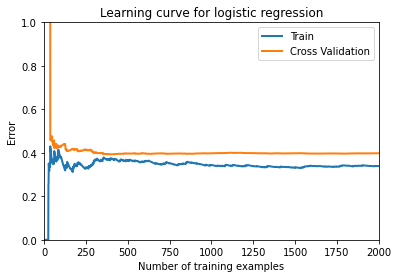

In [16]:

X_aug = X
Xval_aug = X_C

error_train, error_val = learningCurveNoReg(X_aug, y, Xval_aug, y_C)

pyplot.plot(np.arange(1, m+1), error_train, np.arange(1, m+1), error_val, lw=2)
pyplot.title('Learning curve for logistic regression')
pyplot.legend(['Train', 'Cross Validation'])
pyplot.xlabel('Number of training examples')
pyplot.ylabel('Error')
pyplot.axis([0, 2000, 0, 1])

print('# Training Examples\tTrain Error\tCross Validation Error')
for i in range(m):
    print('  \t%d\t\t%f\t%f' % (i+1, error_train[i], error_val[i]))

In [17]:
# Calculate precision, recall, F1 score

import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(y_C, p_C)
prec = precision_score(y_C, p_C)
rec = recall_score(y_C, p_C)
f1 = f1_score(y_C, p_C)

results = pd.DataFrame([['Logistic Regression', 
acc, prec, rec, f1]],
columns = ['Model', 'Accuracy', 'Precision', 
'Recall', 'F1 Score'])
print (results)

                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.838081   0.692308  0.079646  0.142857
